<a href="https://colab.research.google.com/github/uday95577/Age/blob/main/Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
# Display the first 5 rows of the DataFrame
print(train_df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print(train_df.info())

# Get descriptive statistics for numerical columns
print(train_df.describe())

# Check for the number of unique values in each column
print(train_df.nunique())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


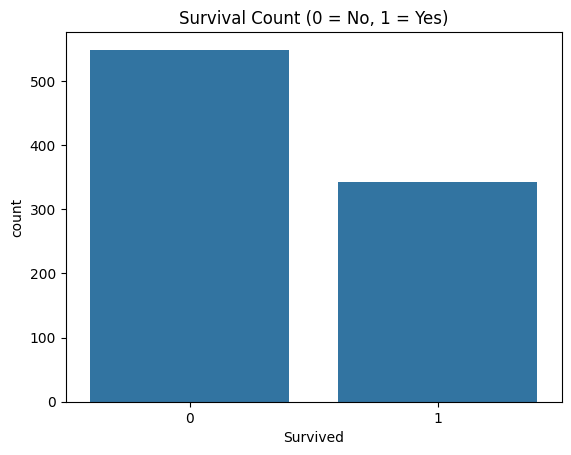

In [5]:
# Check the distribution of 'Survived'
print(train_df['Survived'].value_counts())
print(train_df['Survived'].value_counts(normalize=True)) # Percentage

# Visualize the 'Survived' distribution
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

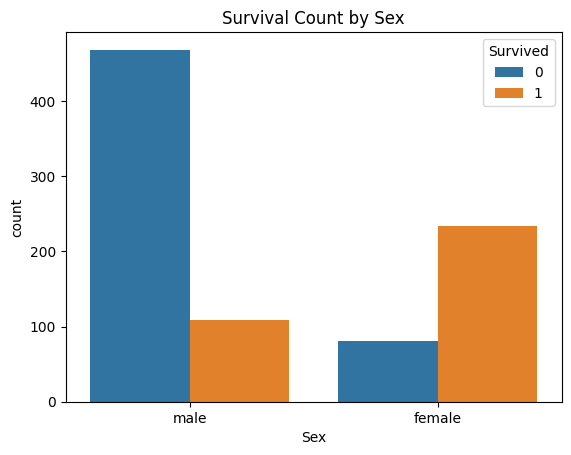

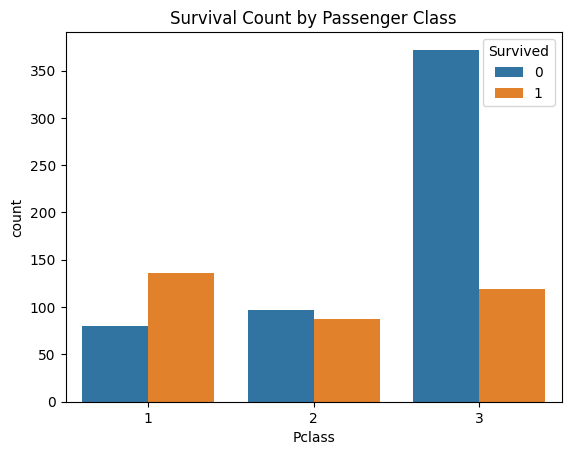

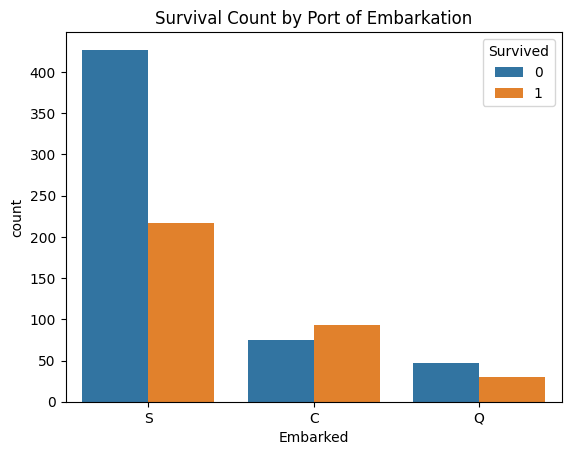

In [6]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

# Survival by Pclass (Passenger Class)
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()

# Survival by Embarked (Port of Embarkation)
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Count by Port of Embarkation')
plt.show()

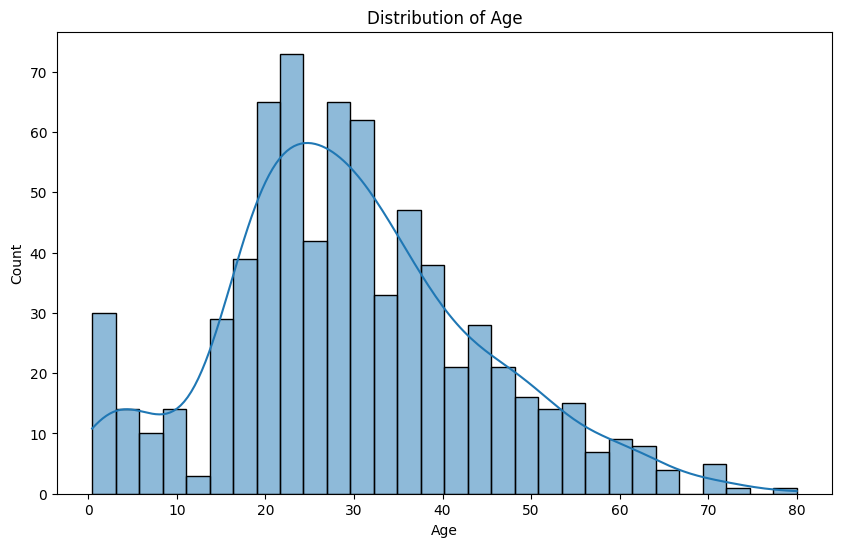

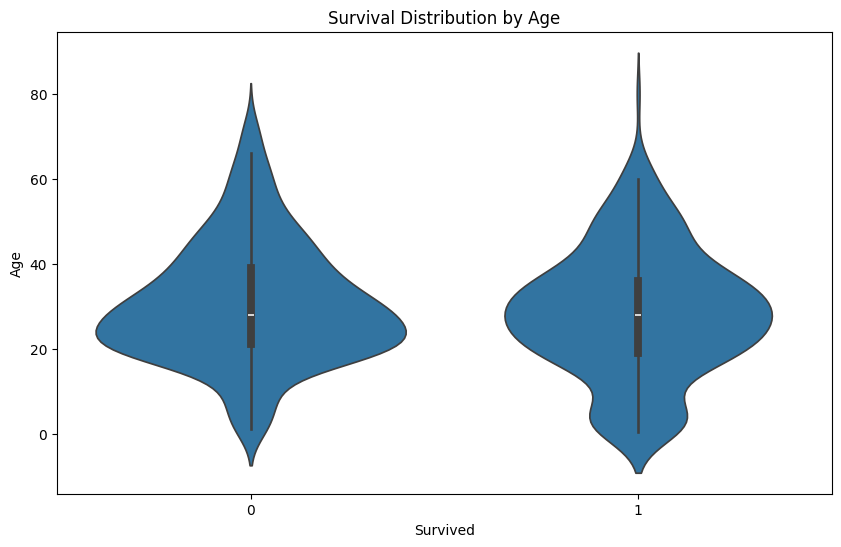

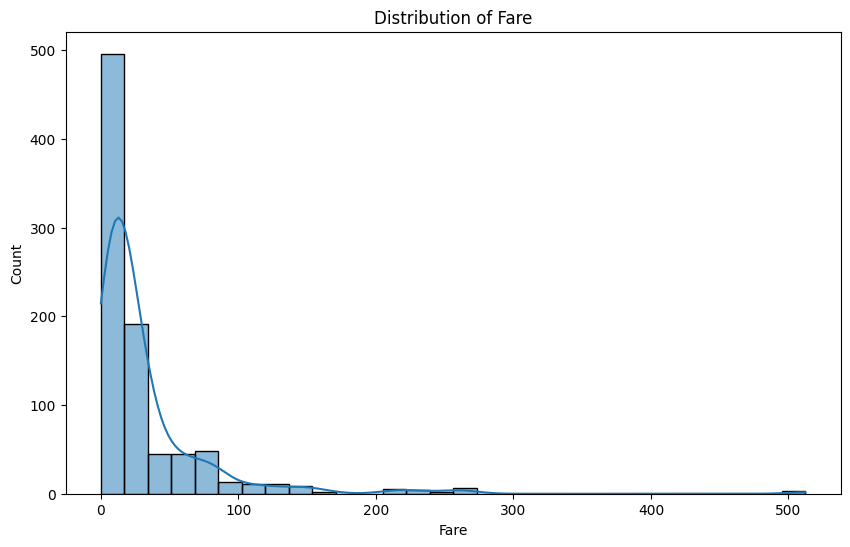

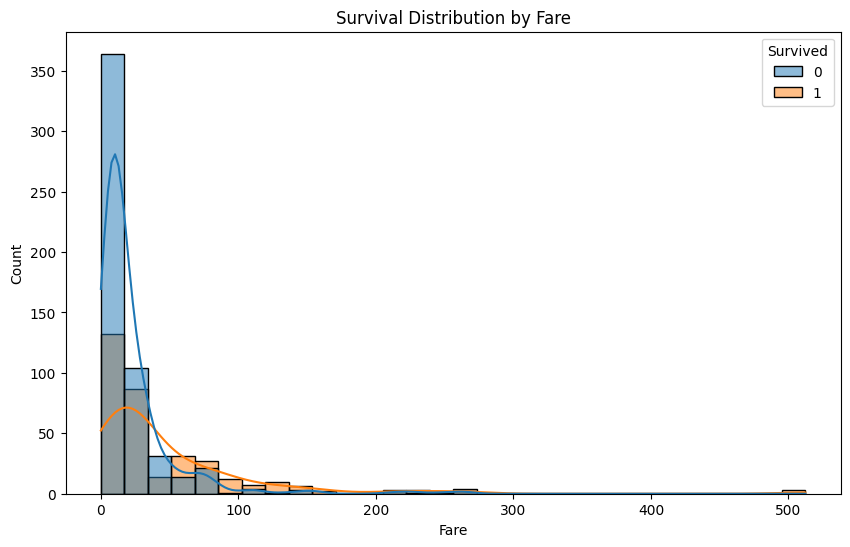

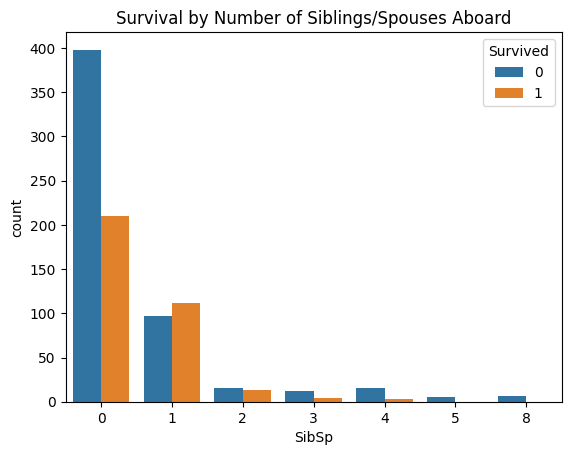

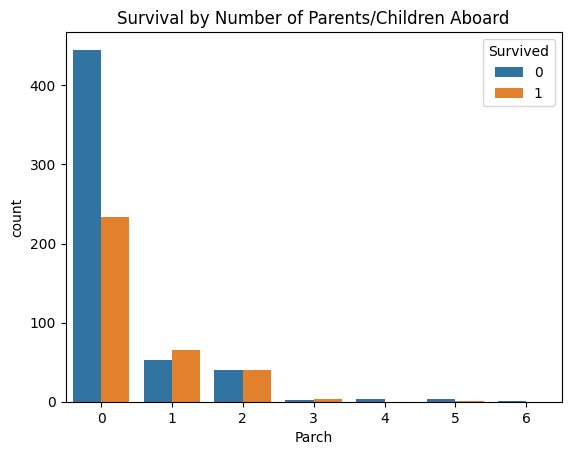

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30) # dropna to ignore missing values
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival by Age (using a violin plot or kdeplot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=train_df)
plt.title('Survival Distribution by Age')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Survival by Fare
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', hue='Survived', data=train_df, kde=True, bins=30)
plt.title('Survival Distribution by Fare')
plt.show()

# Relationship between SibSp (siblings/spouses aboard) and Survived
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.show()

# Relationship between Parch (parents/children aboard) and Survived
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('Survival by Number of Parents/Children Aboard')
plt.show()

In [10]:
# Fill missing 'Age' values with the median age
# Using .loc to ensure you're working on the original DataFrame view
train_df.loc[:, 'Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [11]:
# Fill missing 'Embarked' values with the mode
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_frequent_embarked)
print("Missing 'Embarked' values after imputation:", train_df['Embarked'].isnull().sum())

Missing 'Embarked' values after imputation: 0


In [12]:
# Drop the 'Cabin' column due to too many missing values
train_df.drop('Cabin', axis=1, inplace=True)
print("Columns after dropping 'Cabin':", train_df.columns)

Columns after dropping 'Cabin': Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [13]:
# Drop unnecessary columns
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
print("Final columns before encoding:", train_df.columns)
print("Updated DataFrame head:\n", train_df.head())

Final columns before encoding: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Updated DataFrame head:
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [14]:
# Encode 'Sex' (e.g., male=0, female=1)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
print("Encoded 'Sex' column head:\n", train_df['Sex'].head())

Encoded 'Sex' column head:
 0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


In [15]:
# One-Hot Encode 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True, dtype=int)
# drop_first=True avoids multicollinearity (if S is 0 and Q is 0, then C must be 0)
print("DataFrame head after One-Hot Encoding 'Embarked':\n", train_df.head())
print("Columns after One-Hot Encoding:", train_df.columns)

DataFrame head after One-Hot Encoding 'Embarked':
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500           0           1
1         1       1    1  38.0      1      0  71.2833           0           0
2         1       3    1  26.0      0      0   7.9250           0           1
3         1       1    1  35.0      1      0  53.1000           0           1
4         0       3    0  35.0      0      0   8.0500           0           1
Columns after One-Hot Encoding: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [16]:
# One-Hot Encode 'Pclass'
train_df = pd.get_dummies(train_df, columns=['Pclass'], drop_first=True, dtype=int)
print("DataFrame head after One-Hot Encoding 'Pclass':\n", train_df.head())
print("Final columns after all preprocessing:", train_df.columns)

DataFrame head after One-Hot Encoding 'Pclass':
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0    0  22.0      1      0   7.2500           0           1   
1         1    1  38.0      1      0  71.2833           0           0   
2         1    1  26.0      0      0   7.9250           0           1   
3         1    1  35.0      1      0  53.1000           0           1   
4         0    0  35.0      0      0   8.0500           0           1   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  
Final columns after all preprocessing: Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [17]:
# Create 'FamilySize' feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 # +1 for the passenger themselves
print("FamilySize head:\n", train_df['FamilySize'].head())

# Create 'IsAlone' feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int) # 1 if alone, 0 otherwise
print("IsAlone head:\n", train_df['IsAlone'].head())

# Now we can drop SibSp and Parch if we want, as their info is in FamilySize/IsAlone
# train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# print("Columns after dropping SibSp and Parch:", train_df.columns)

FamilySize head:
 0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64
IsAlone head:
 0    0
1    0
2    1
3    0
4    1
Name: IsAlone, dtype: int64


In [18]:
# Define features (X) and target (y)
X = train_df.drop('Survived', axis=1) # All columns except 'Survived'
y = train_df['Survived'] # Only the 'Survived' column

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())


Features (X) head:
    Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  \
0    0  22.0      1      0   7.2500           0           1         0   
1    1  38.0      1      0  71.2833           0           0         0   
2    1  26.0      0      0   7.9250           0           1         0   
3    1  35.0      1      0  53.1000           0           1         0   
4    0  35.0      0      0   8.0500           0           1         0   

   Pclass_3  FamilySize  IsAlone  
0         1           2        0  
1         0           2        0  
2         1           1        1  
3         0           2        0  
4         1           1        1  

Target (y) head:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify the distribution of 'Survived' in training and testing sets
print("\ny_train 'Survived' distribution:\n", y_train.value_counts(normalize=True))
print("\ny_test 'Survived' distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)

y_train 'Survived' distribution:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

y_test 'Survived' distribution:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and handles L1/L2 regularization

In [21]:
# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


Accuracy: 0.8212
Precision (for Survived=1): 0.8246
Recall (for Survived=1): 0.6812
F1-Score (for Survived=1): 0.7460

Confusion Matrix:
[[100  10]
 [ 22  47]]


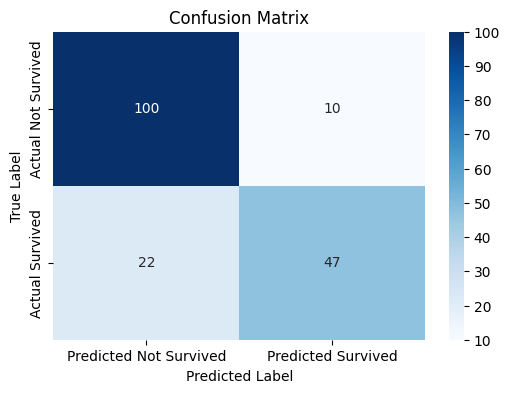


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, F1-Score (for the 'Survived' class, which is 1)
# 'pos_label=1' specifies that '1' (Survived) is our positive class
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"Precision (for Survived=1): {precision:.4f}")
print(f"Recall (for Survived=1): {recall:.4f}")
print(f"F1-Score (for Survived=1): {f1:.4f}")

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix (optional, but good for resume projects)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display Classification Report (provides all metrics for both classes)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))